# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

**Решение:**
Пусть $y$ соответствует истинному значению на объекте $x$, а $\hat{y}$ - предсказанному алгоритмом. Тогда $$E(MSE(X)) = E\frac{1}{|X|} \sum_{x_i \in X}{(y_i - \hat{y_i})^2} = E\frac{1}{|X|} \sum_{x_i \in X}{(y_i^2 - 2\hat{y_i}y_i + \hat{y_i}^2)}.$$ Все $y_i$ одинаково распределены и все $\hat{y_i}$ одинаково распределены, все $y_i и \hat{y_i}$ попарно независимы, поэтому $$E(MSE(X)) = \frac{1}{|X|} \sum_{x_i \in X}{Ey_i^2 - 2Ey_i\cdot E\hat{y_i} + E\hat{y_i}^2} = Ey^2 - 2Ey\cdot E\hat{y} + E\hat{y}^2.$$ Если отвечать случайным значением значением, то $y \sim \hat{y}$ и $E(MSE(X)) = Ey^2 - 2Ey\cdot E\hat{y} + E\hat{y}^2 = Ey^2 - (Ey)^2 + E\hat{y} - (E\hat{y})^2 = 2D\hat{y}.$ 

Если отвечать средним значением, то $$\hat{y}_{average} \sim y \Rightarrow E\hat{y} = E\hat{y}_{average} = Ey$$ и $$E\hat{y}_{average}^2 = E\frac{(\sum_{i = 1}^{|X|} y_i)^2}{|X|^2} = \frac{1}{|X|^2} \cdot (|X|\cdot E\hat{y}^2 + |X|\cdot (|X| - 1)\cdot (E\hat{y})^2) = \frac{E\hat{y}^2}{|X|} + \frac{|X| - 1}{|X|}\cdot (E\hat{y})^2.$$ $$E(MSE(X)) = Ey^2 - 2Ey\cdot E\hat{y} + E\hat{y}^2 = E\hat{y}_{average}^2 - (E\hat{y}_{average})^2 + E\hat{y}^2 - (E\hat{y})^2 = \frac{E\hat{y}^2}{|X|} + \frac{|X| - 1}{|X|}\cdot (E\hat{y})^2 - (E\hat{y})^2 + D\hat{y} = \frac{1}{|X|}D(\hat{y}) + D\hat{y} = \frac{|X| + 1}{|X|}D\hat{y}.$$ Получаем, что во втором случае матожидание ошибки меньше, отвечать нужно средним.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $R$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

**Решение:**
    Обозначим $I(R, c) = \sum_{(x_i,y_i) \in R} L(y_i, c)$. Тогда из условия $$H(R) = \min_{c \in Y} I(R,c)$$ следует условие $$\frac{\partial I(R, c)}{\partial c} = \sum_{(x_i,y_i) \in R} \frac{\partial L(y_i, c)}{\partial c} = 0.$$
    
**1.** $\frac{\partial L(y_i, c)}{\partial c} = 2 \cdot (y_i - c)$, $$\frac{\partial I(R, c)}{\partial c} = \sum_{(x_i,y_i) \in R} 2 \cdot (y_i - c) = 2 \cdot \sum_{(x_i,y_i) \in R} y_i - 2 \cdot |R| \cdot c \Rightarrow$$
$$c = \frac{\sum_{(x_i,y_i) \in R} y_i}{|R|} = \overline{y}.$$
Нетрудно проверить, что для данного значения c достигается минимум и $$H(R) = \sum_{(x_i,y_i) \in R} L(y_i, \overline{y} = \sum_{(x_i, y_i) \in R} (y_i - \overline{y})^2 = D(y).$$

**2.** В этом случае функция $I(R,c)$ зависит от K параметров, поэтому производные по каждому из параметров $c_k$ равны нулю: $$\frac{\partial L(y_i, c_k)}{\partial c} = 2 \cdot (c_k - [y=k]),$$ $$\frac{\partial I(R, c)}{\partial c_k} = \frac{1}{|R|}\sum_{(x_i,y_i \in R} 2 \cdot (c_k - [y=k]) = \frac{1}{|R|}\sum_{(x_i,y_i \in R} (2 \cdot c_k \cdot [y_i \neq k] + 2 \cdot (c_k - 1) \cdot [y_i = k]) = 2 \cdot c_k \cdot P(y_ \neq k) + 2 \cdot (c_k - 1) \cdot P(y = k)) = c_k - 2 \cdot P(y = k) = 0 \Rightarrow c_k = P(y = k).$$

При таких значениях c_k достигается минимум, теперь посчитаем его: $$ H(R) = \frac{1}{|R|} \sum_{x_i,y_i \in R} \sum_{k=1}^K (P(y = k) - [y_i = k])^2 = \frac{1}{|R|} \sum_{i=1}^K |R| \cdot P(y = i) \cdot \sum_{k=1}^K (P(y = k) - [y_i = k])^2 = \sum_{i=1}^K P(y = i) \cdot (\sum_{k=1}^K P^2(y = k) - 2 \cdot P(y = i) + 1) = \sum_{i=1}^K P(y = i) - 2 \cdot \sum_{i=1}^K P^2(y = i) + \sum_{i=1}^K P(y = i) \cdot \sum_{k=1}^K P^2(y = k) = 1 - 2 \cdot \sum_{i=1}^K P^2(y = i) + \sum_{k=1}^K P^2(y = k) = 1 - \sum_{k=1}^K P^2(y = k).$$ Получили критерий Джини.

**3.** Дополнительное условие: $$\sum_{(k = 1)}^K c_k = 1.$$ Аналогично, $$I(R, c) = \frac{1}{|R|}\cdot \sum_{(x_i,y_i \in R)} L(y_i, c) = -\frac{1}{|R|}\cdot \sum_{(x_i,y_i \in R)} \sum_{k = 1}^K [y = k]\cdot \log_{2} c_k = -\sum_{k = 1}^K \log_{2} c_k \cdot P(y = k) = $$ $$ = -\sum_{k = 1}^{K-1} \log_{2} c_k \cdot P(y = k) - \log_{2}(1 - \sum_{k = 1}^{K-1} c_k) \cdot P(y = K).$$ I(R, c) - функция K-1 аргумента, производные по параметрам равны нулю: $$\frac{\partial I(R, c)}{\partial c_k} = -\frac{1}{c_k\ln 2}\cdot P(y = k) + \frac{1}{(1 - \sum_{k = 1}^K c_k) \cdot \ln 2}\cdot P(y = K) = 0. \Rightarrow \frac{P(y = k)}{c_k} = \frac{P(y = K)}{c_K}.$$ Воспользуемся дополнительным условием: $$\sum_{k = 1}^{K-1} c_k + c_K = (\sum_{k = 1}^{K-1} \frac{P(y = k)}{P(y = K)} + 1) \cdot c_K = \frac{\sum{k = 1}^{K} P(y = k)}{P(y = K)}\cdot c_K = \frac{1}{P(y = K)}\cdot c_K = 1 \Rightarrow c_K = P(y = K)$$ $$\Rightarrow c_k = P(y = k)\forall k \in [1..K].$$

Получаем, что $$ H(R) = -\sum{k = 1}^{K} P(y = k) \cdot \log_{2} P(y = k)$$ - энтропийный критерий.

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

**Решение:** Посчитаем сложность работы алгоритма построения дерева на каждом его уровне(уровень дерева - совокупность всех его вершин на заданной глубине). Обозначим за $d$ текущий уровень дерева, $1 \leqslant d \leqslant D$. В какую-то из вершин этого уровня в совокупности попадают не более чем $l$ объектов из обучающей выборки, т. к. каждый объект попадает не более чем в одну вершину заданного уровня. Для каждой вершины уровня, кроме листьев, для нахождения наилучшего разбиения перебирается не более чем $d \cdot l_{current}$ возможных предикатов, где $l_{current}$ - число объектов, попавших в эту вершину. Сложность вычисления критерия считаем константной, поэтому в каждой вершине время работы равно $\mathcal{O} (d \cdot l_{current})$. Просуммируем по всем вершинам уровня, получим асимптотику $\mathcal{O} (d \cdot l)$. Просуммируем по всем уровням, получим окончательную асимптотику $\mathcal{O} (D \cdot d \cdot l)$. Эта оценка является точной, когда листья встречаются только на последнем уровне дерева.

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Ваш код здесь

frame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=
                        ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'])
frame.head()

buying  maint doors persons lug_boot safety target
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [2]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_frame, encoders = number_encode_features(frame)
data = encoded_frame.drop('target',axis=1)
target = encoded_frame['target']

In [3]:
my_tree = DecisionTreeClassifier()
my_tree.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [4]:
import IPython.display #needed to render in notebook
import io
import pydot  #needed to convert dot format to png
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = io.StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names)
    (graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)

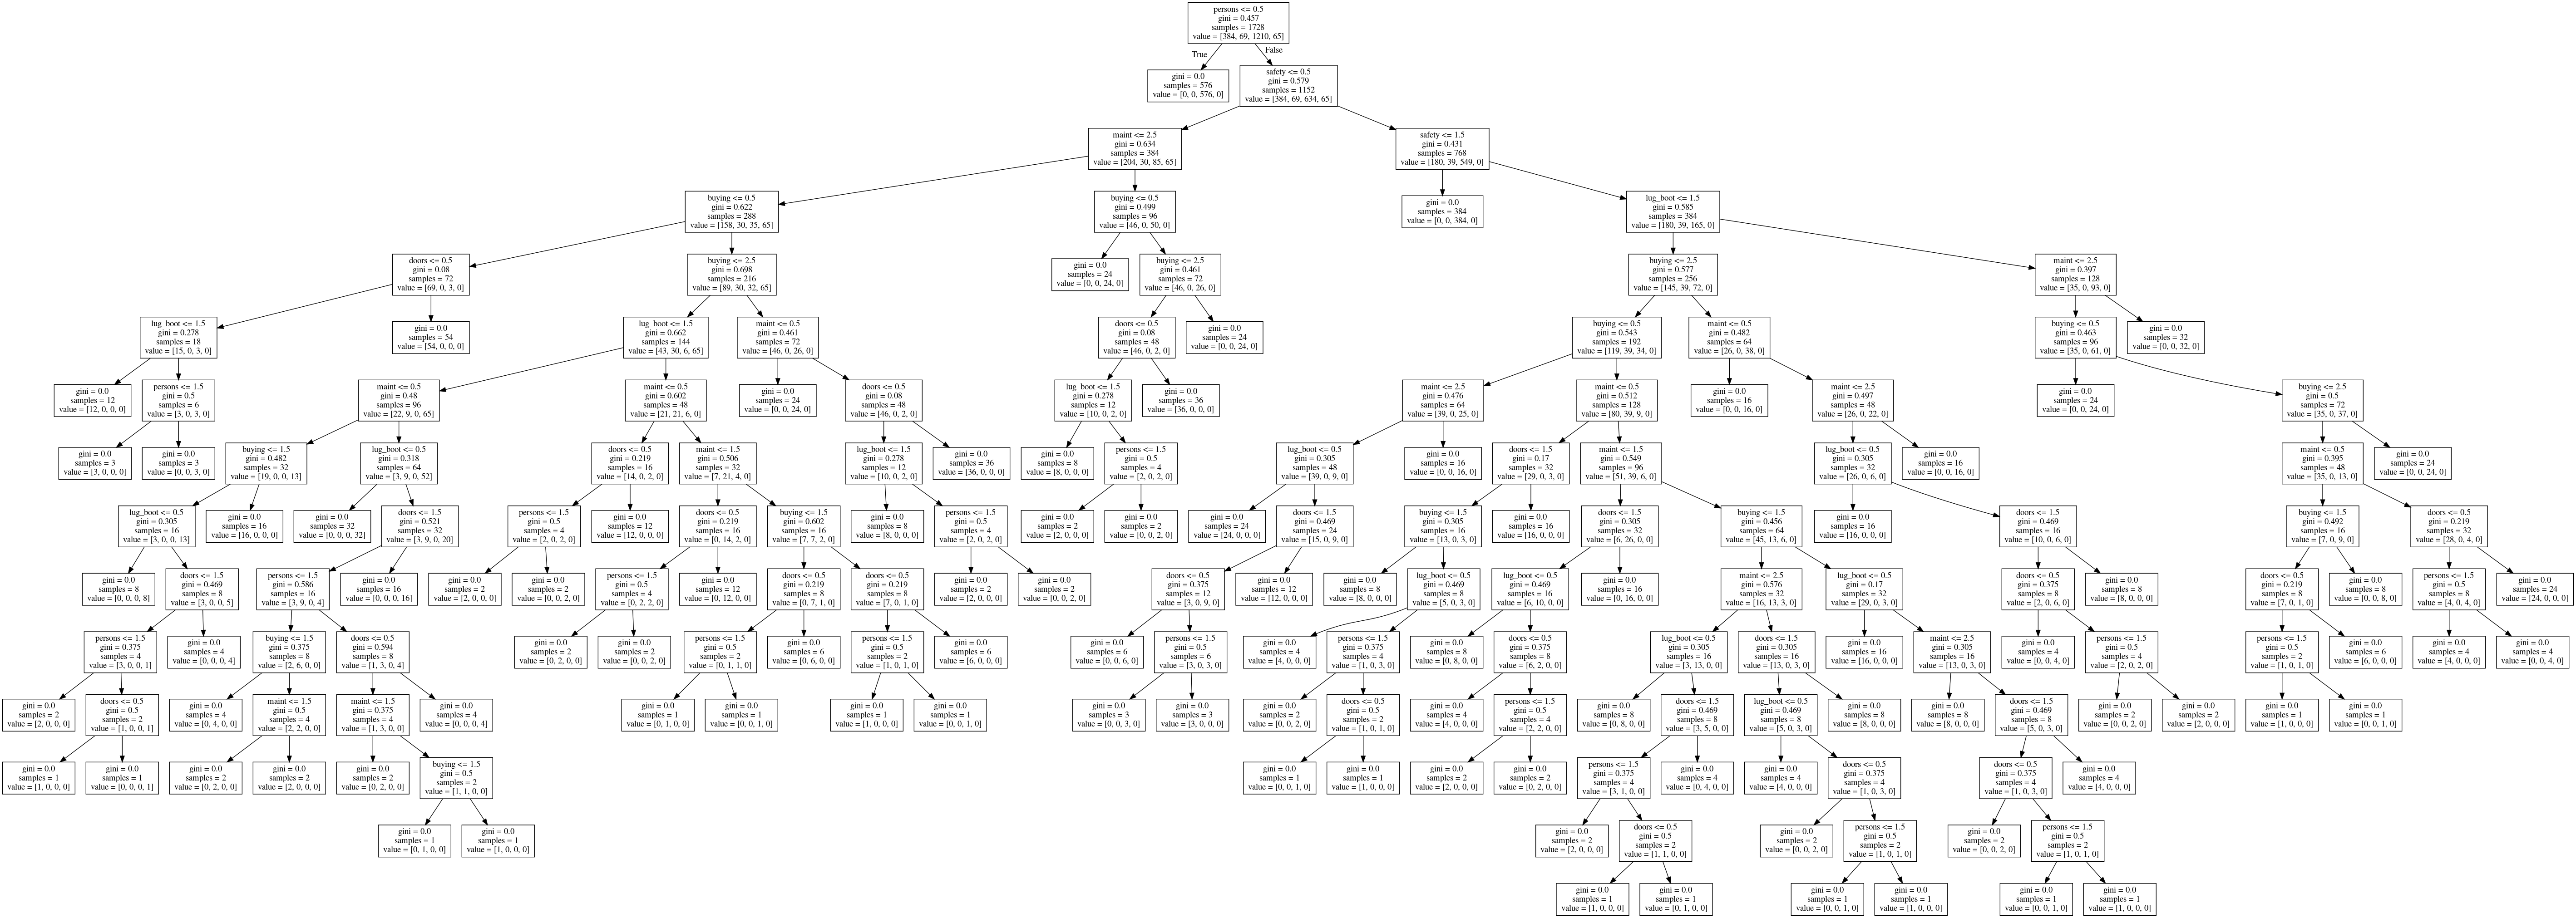

In [5]:
draw_decision_tree(my_tree, data.columns)

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

## Зависимость от глубины дерева:

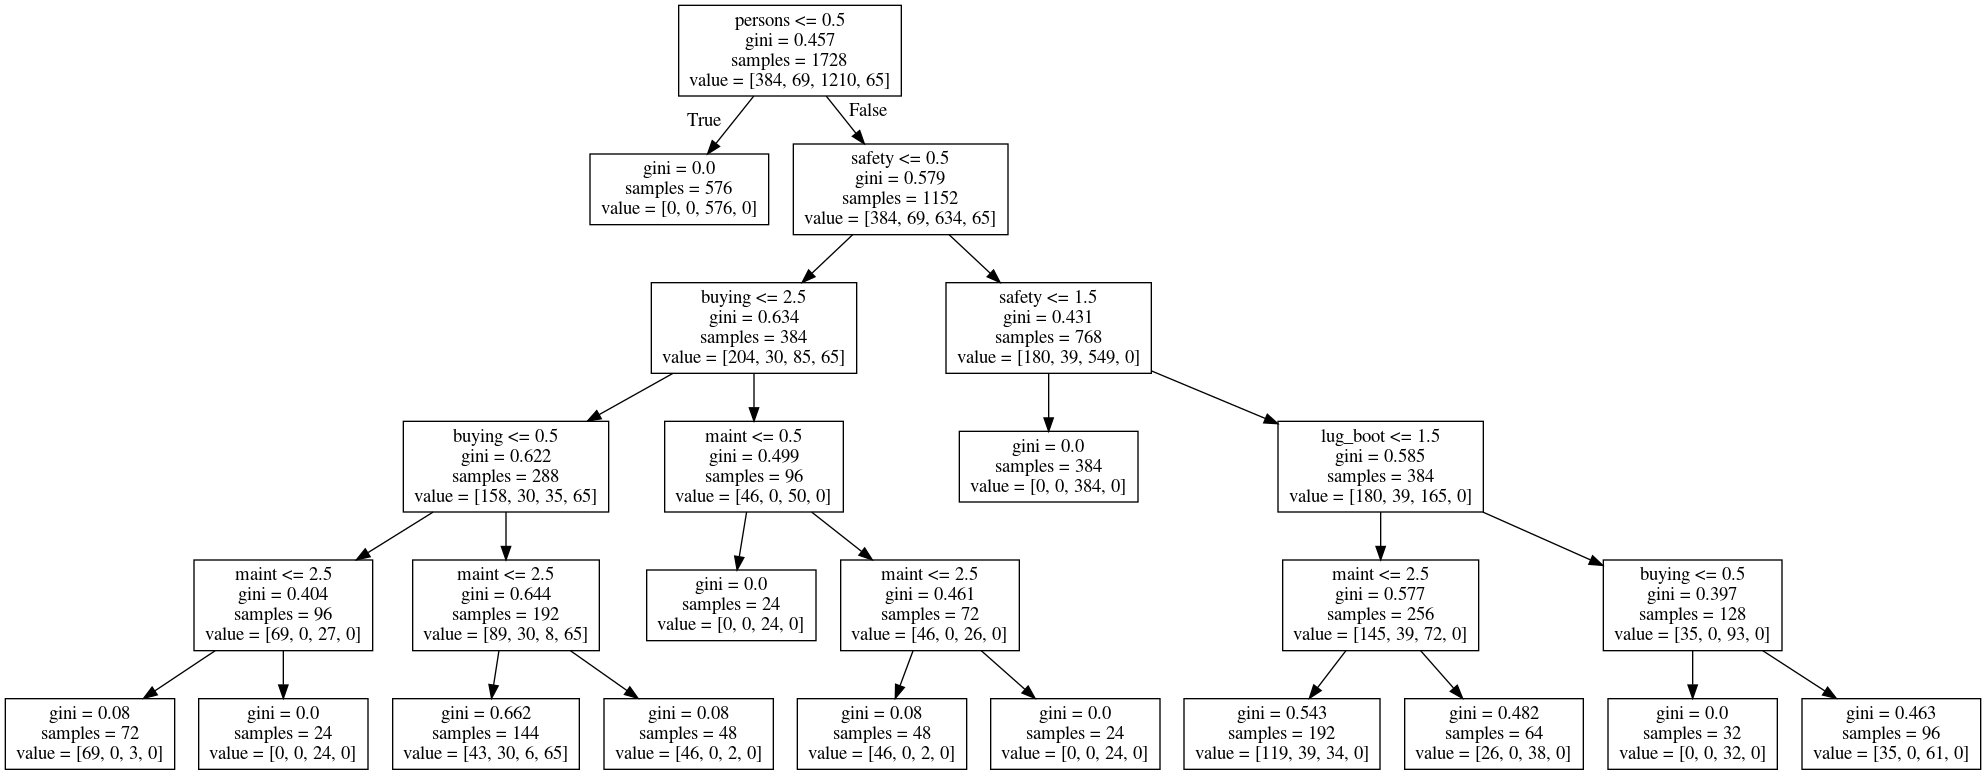

In [6]:
my_tree = DecisionTreeClassifier(max_depth=5)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

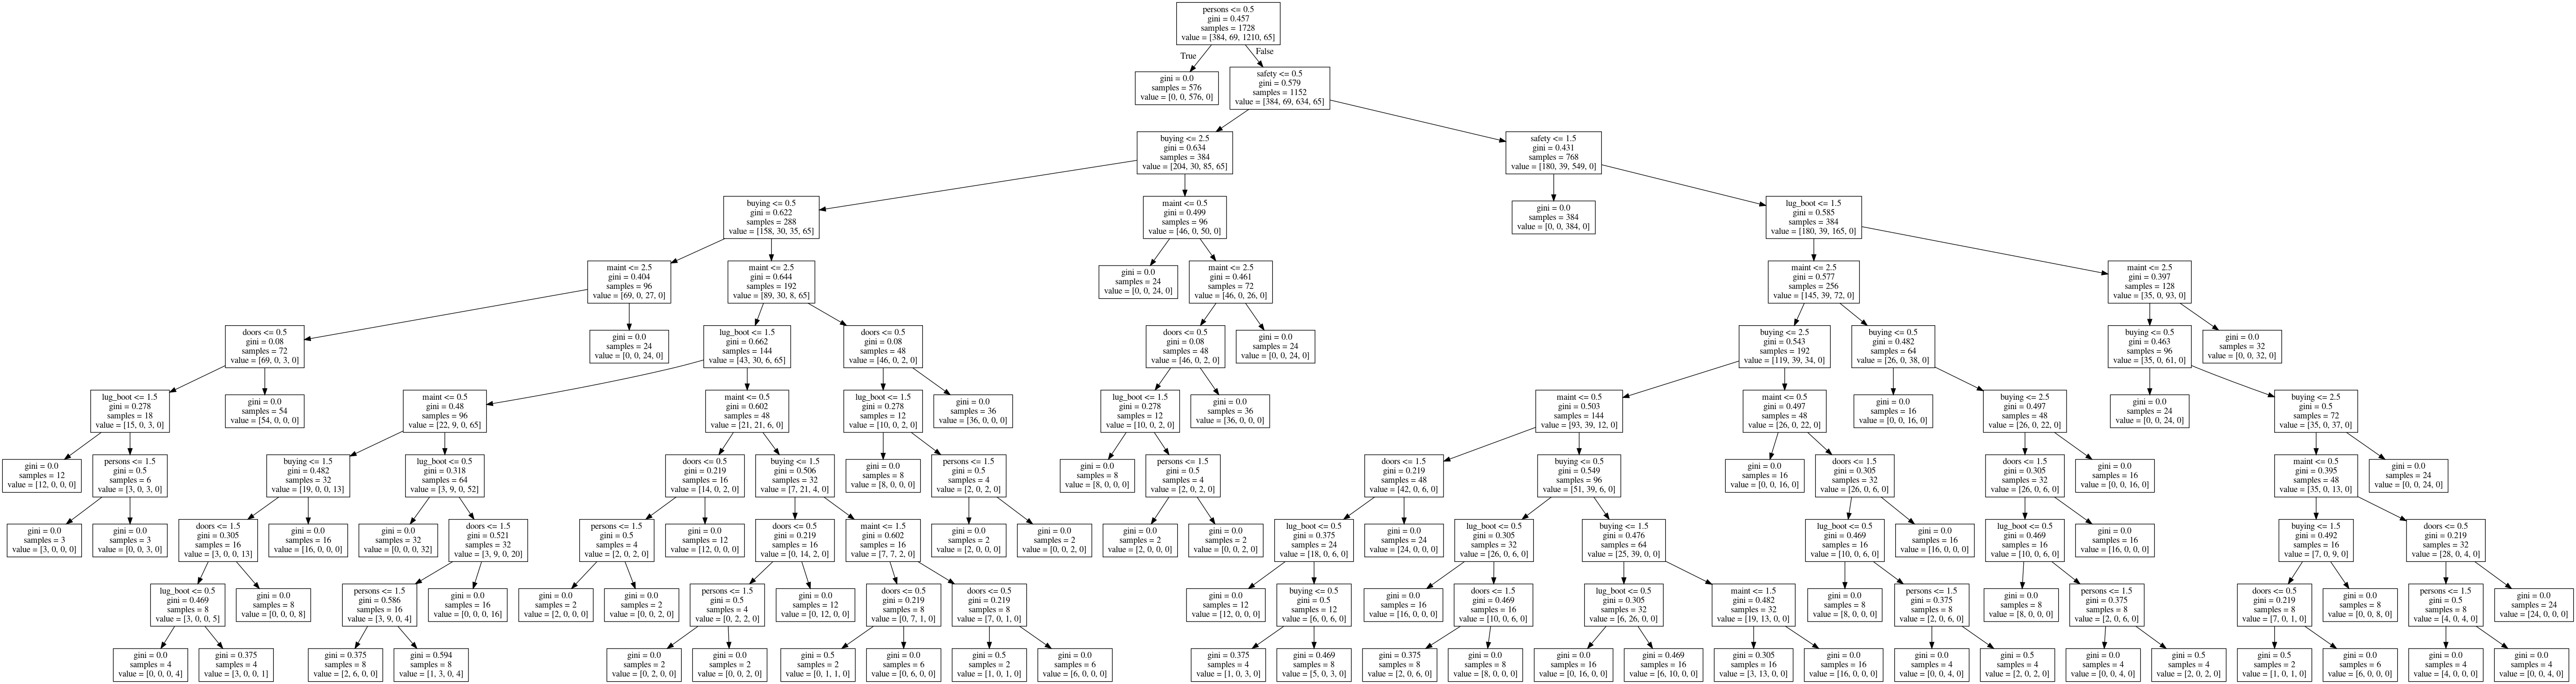

In [7]:
my_tree = DecisionTreeClassifier(max_depth=10)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

**Вывод:** при увеличении максимальной глубины дерева число объектов в листьях уменьшается, как следствие, наблюдается переобучение.

## Зависимость от используемого критерия:

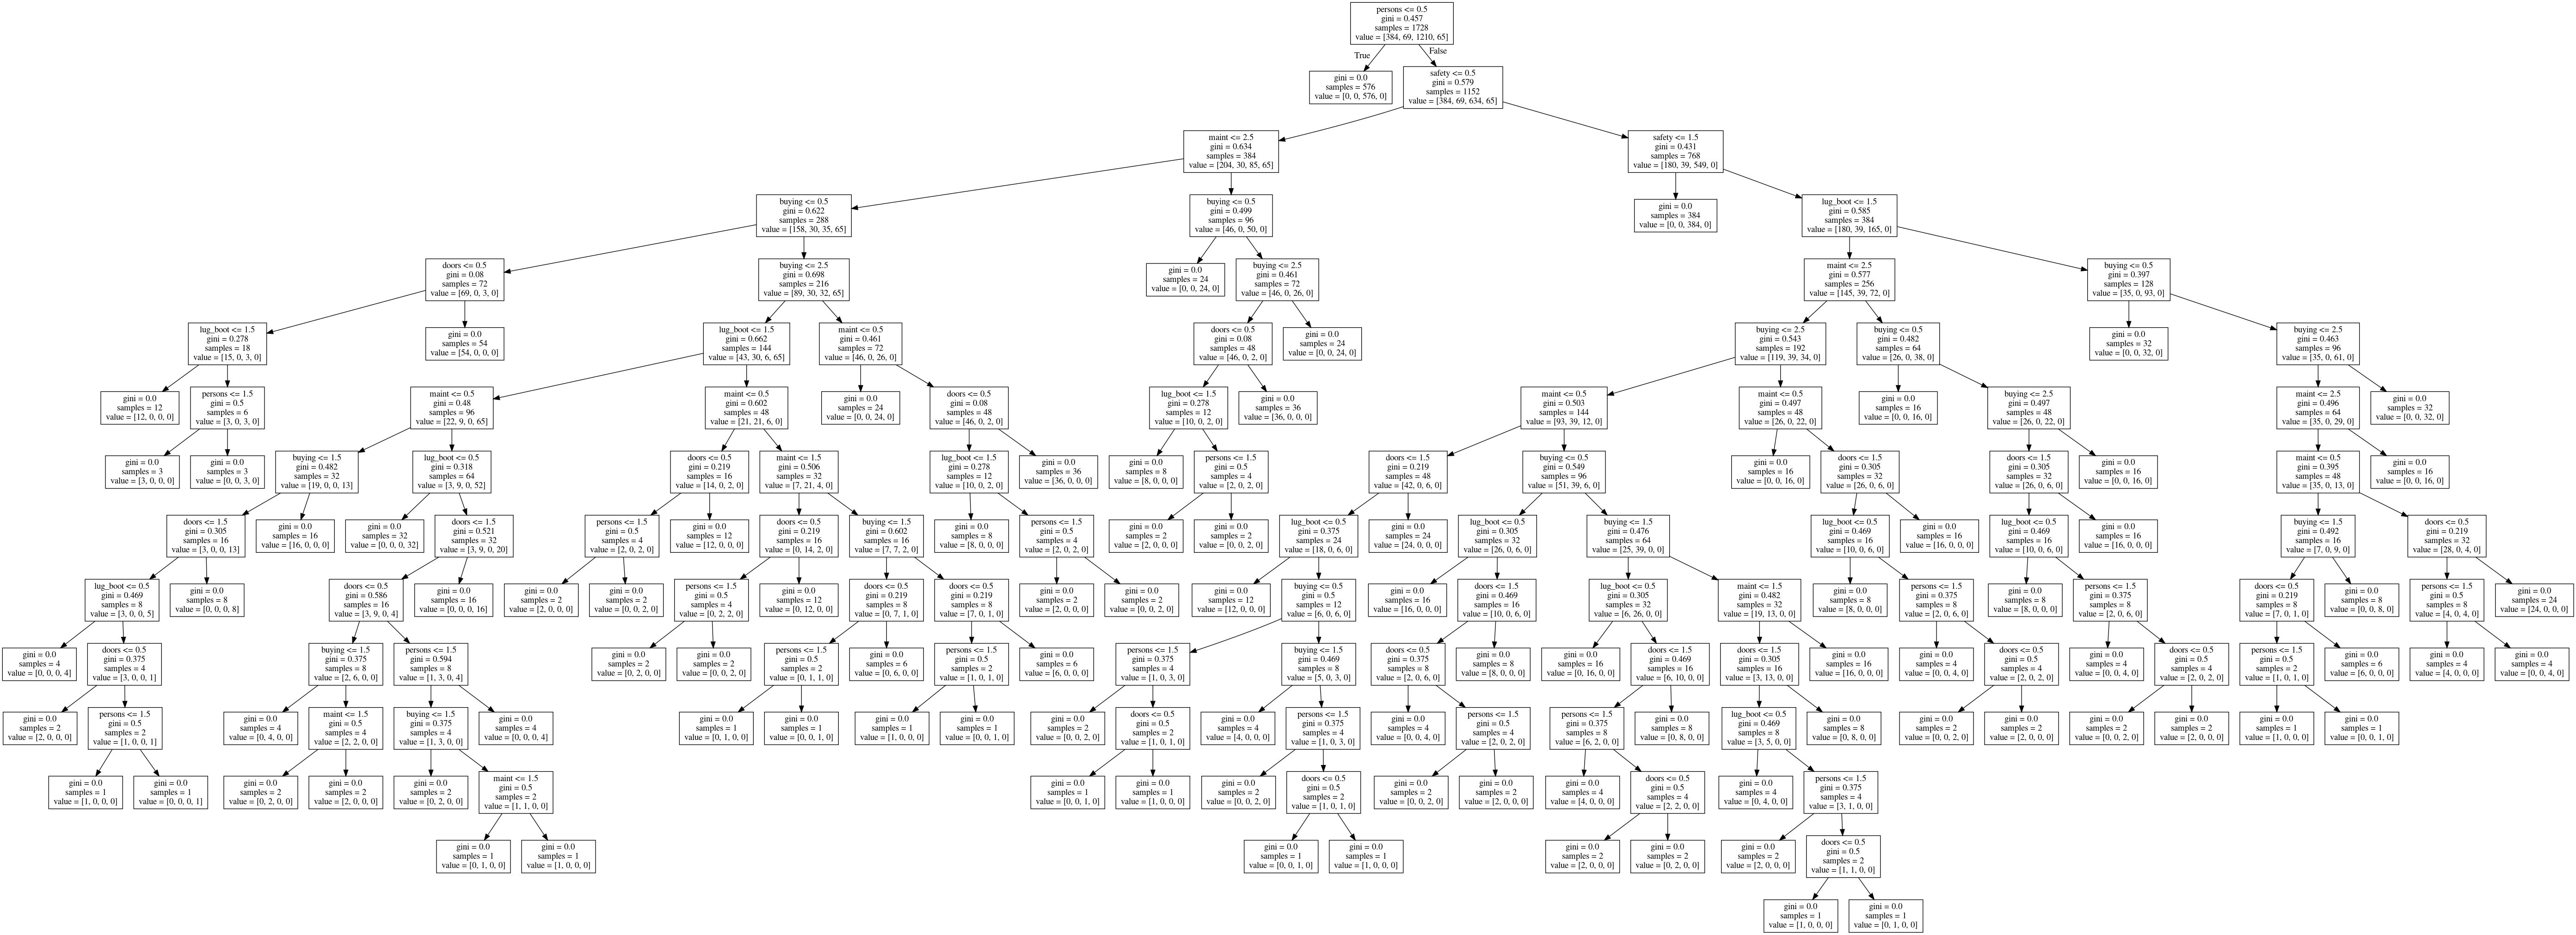

In [8]:
my_tree = DecisionTreeClassifier(criterion='gini')
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

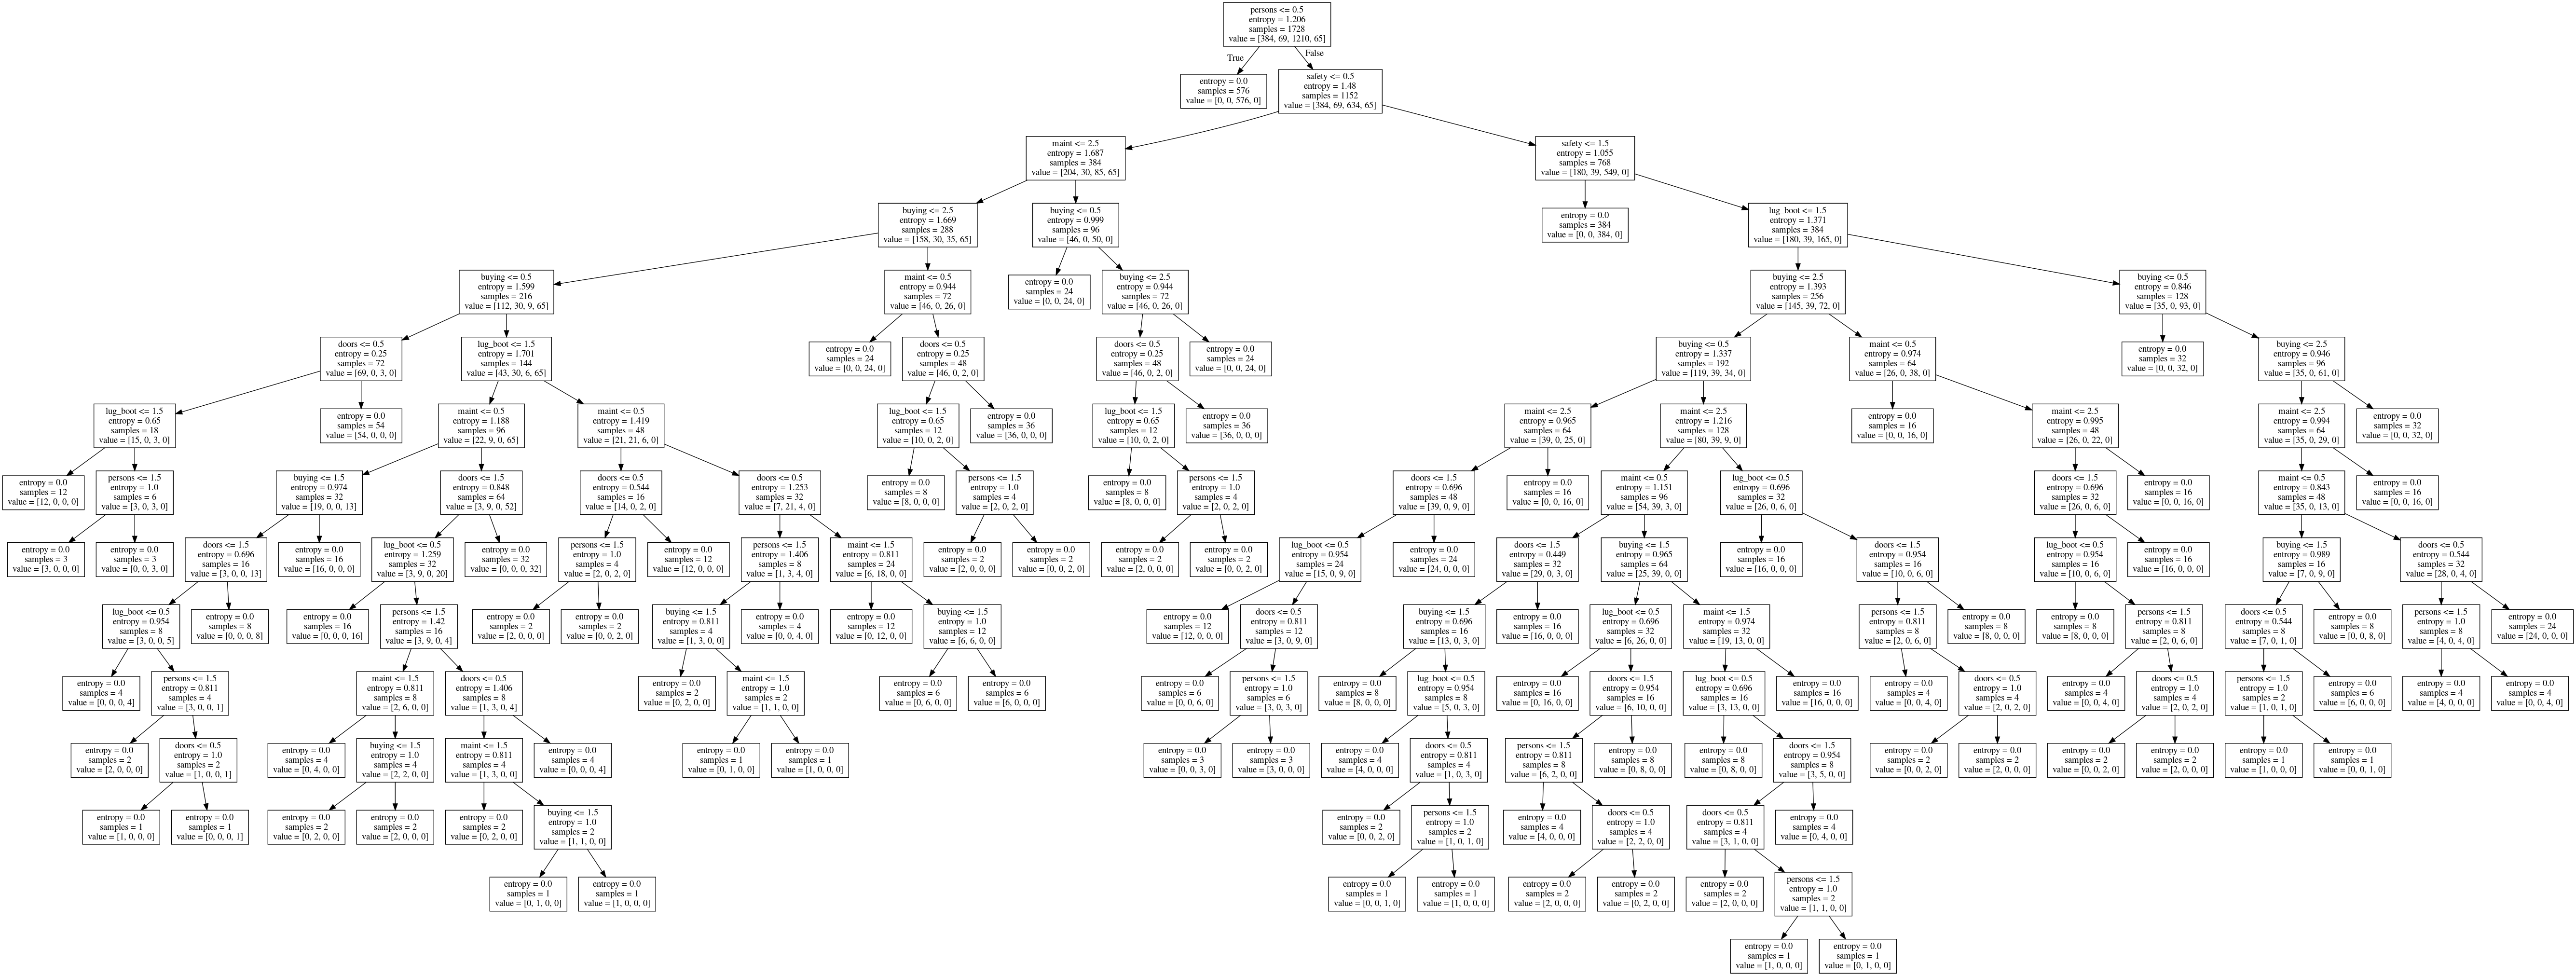

In [9]:
my_tree = DecisionTreeClassifier(criterion='entropy')
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

**Вывод:** особых различий не наблюдается.

## Зависимость от числа объектов в листе:

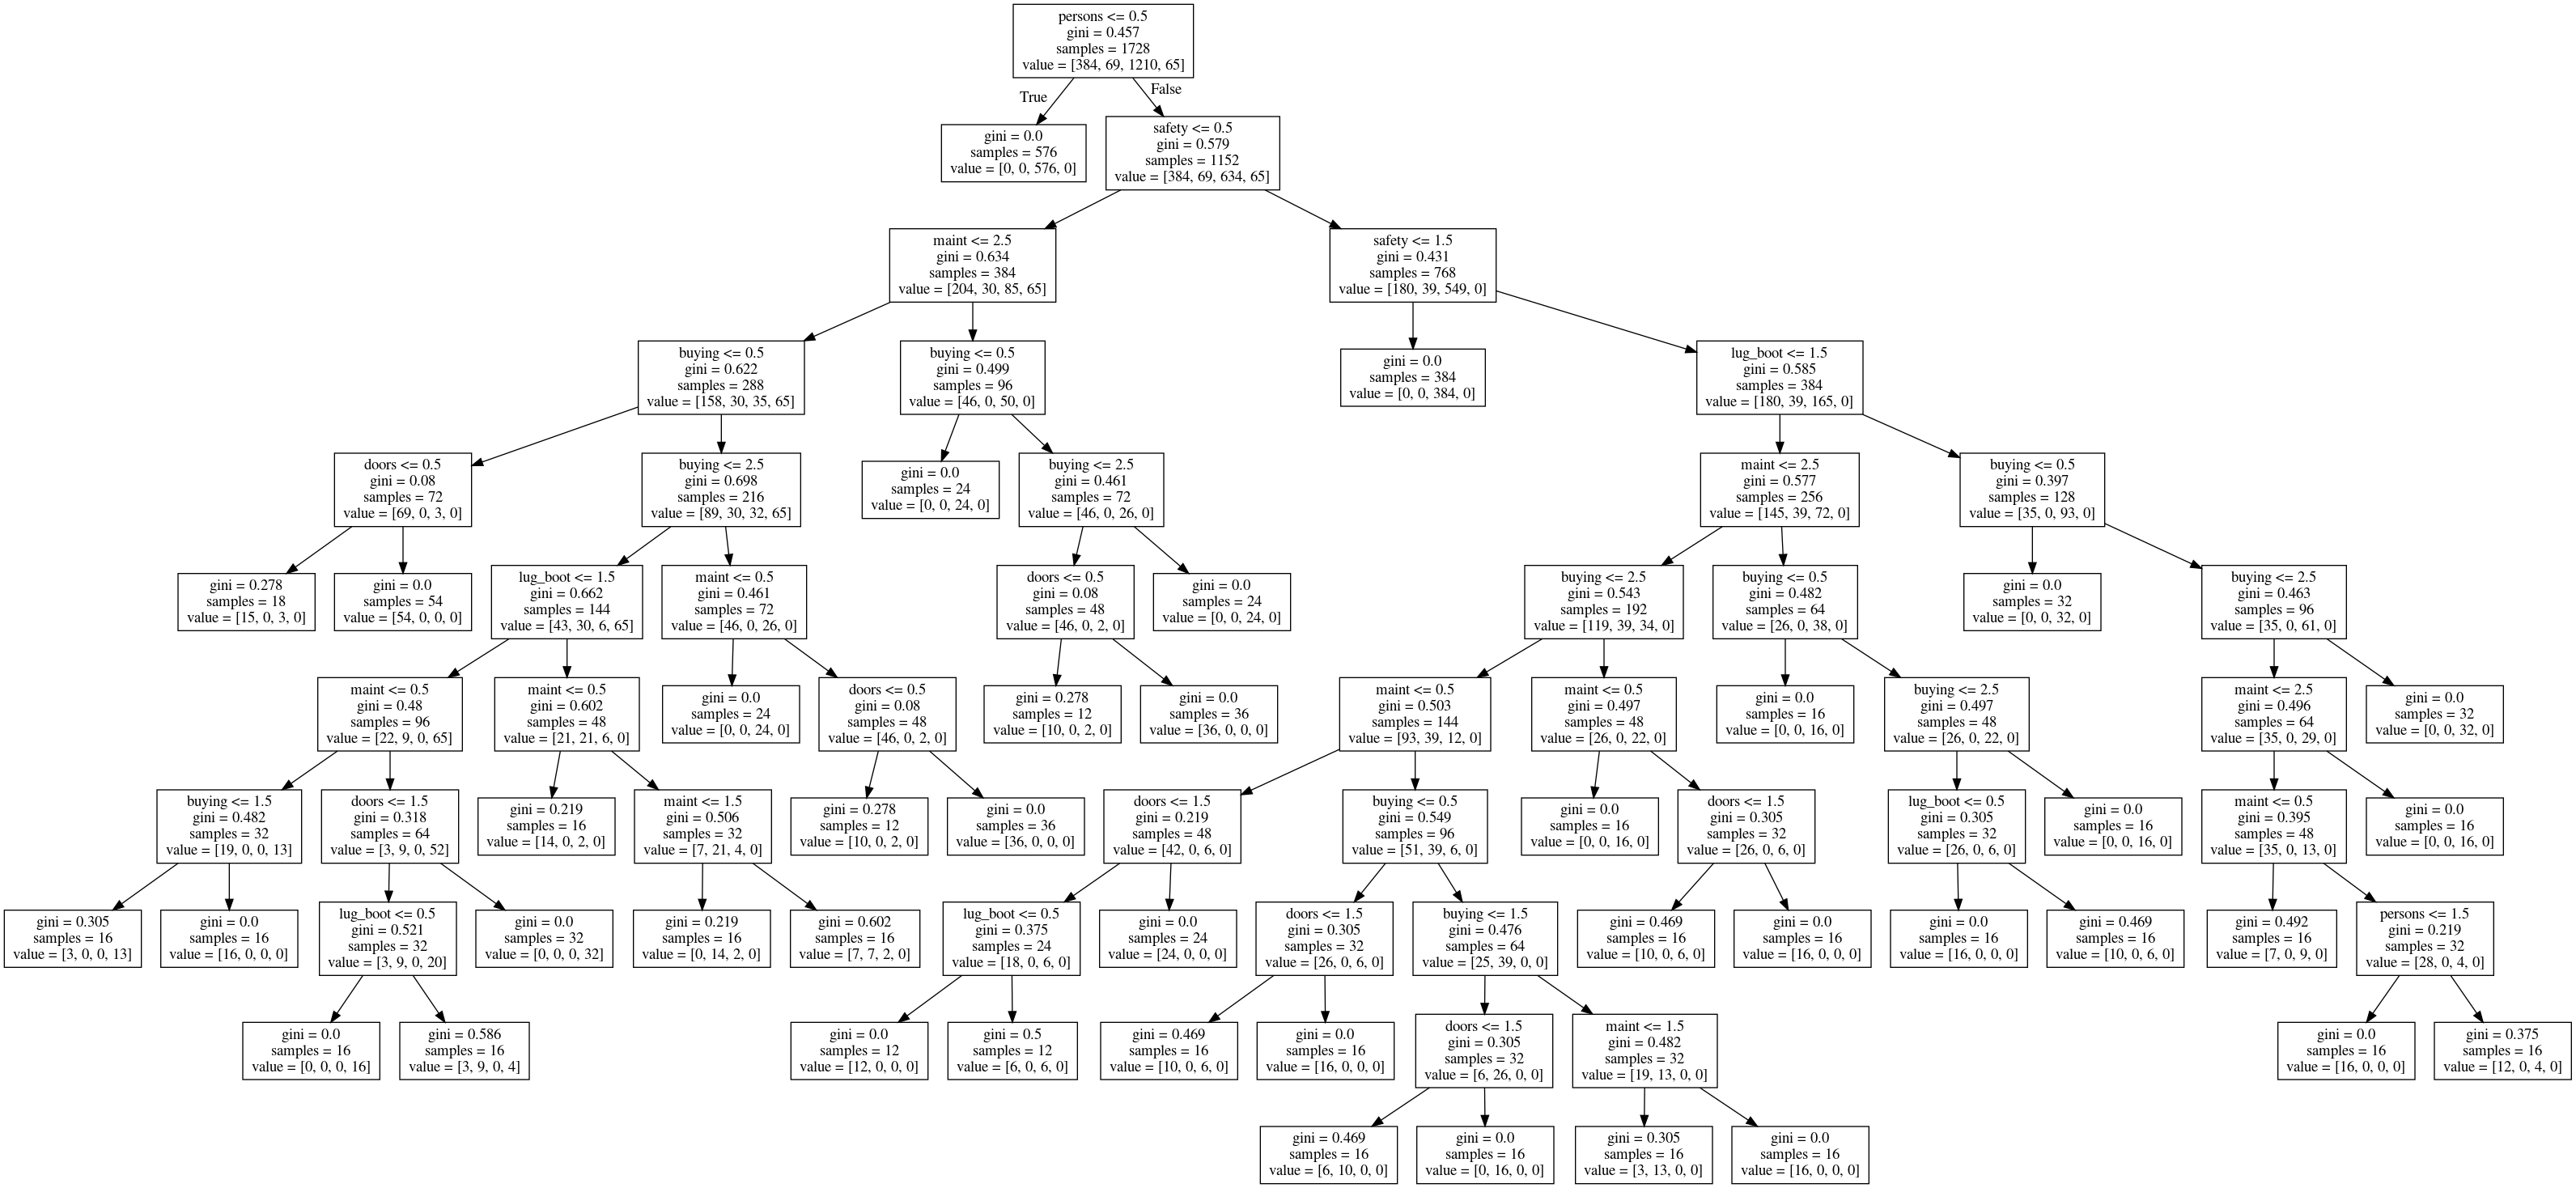

In [10]:
my_tree = DecisionTreeClassifier(min_samples_leaf=10)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

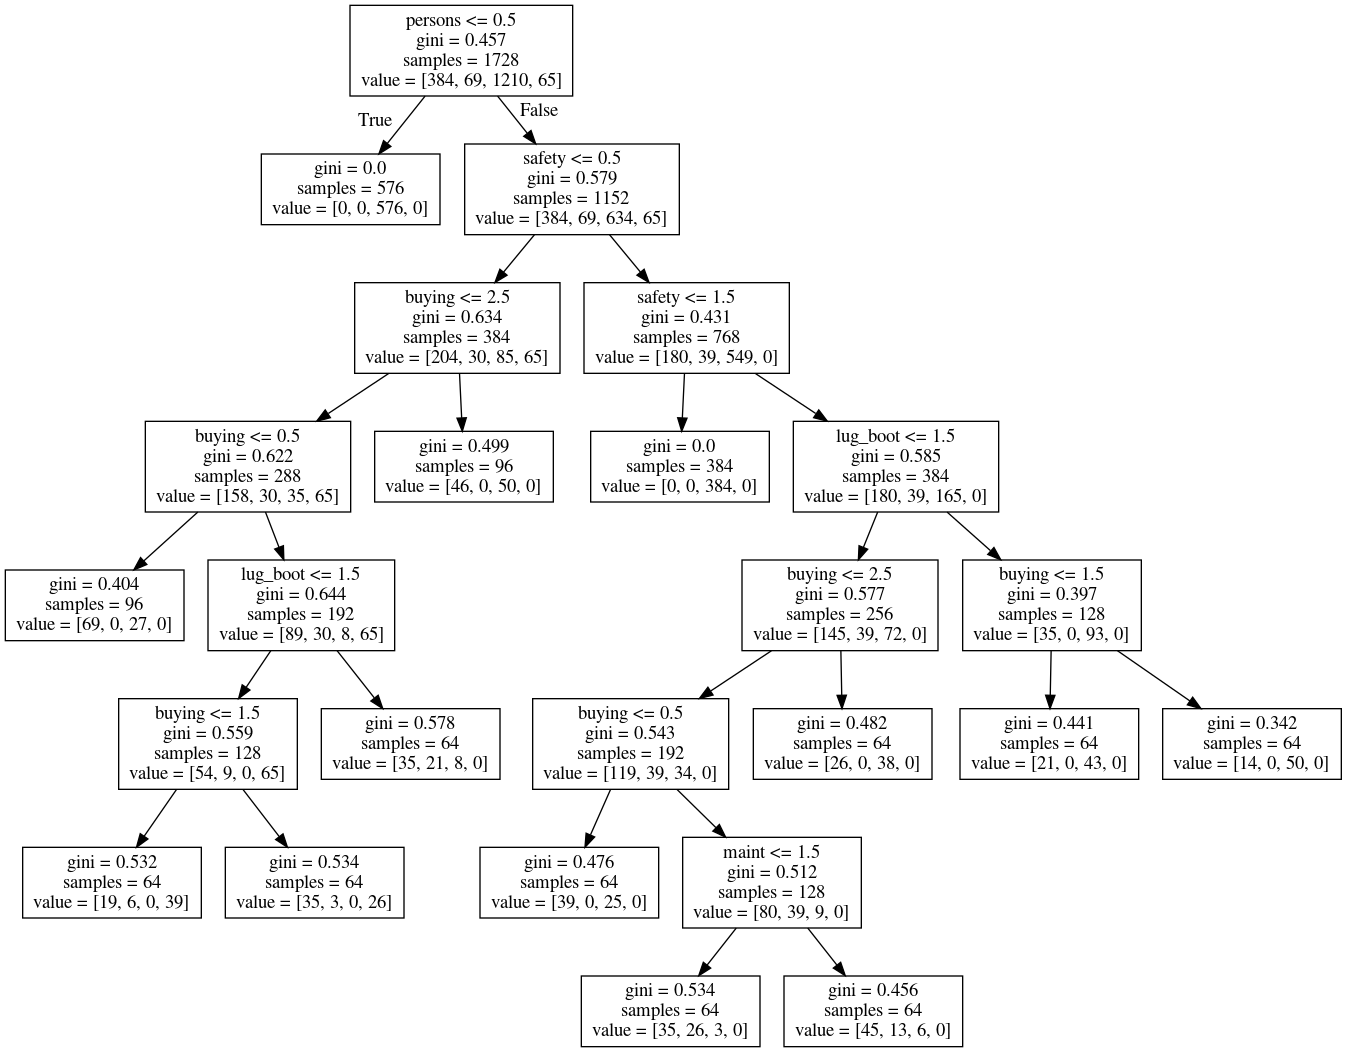

In [11]:
my_tree = DecisionTreeClassifier(min_samples_leaf=50)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

**Вывод:** С увеличением числа объектов в листах возрастает точность модели на обучающей выборке, но также возрастает переобучение.

## Зависимость от числа рассматриваемых признаков при разбиении:

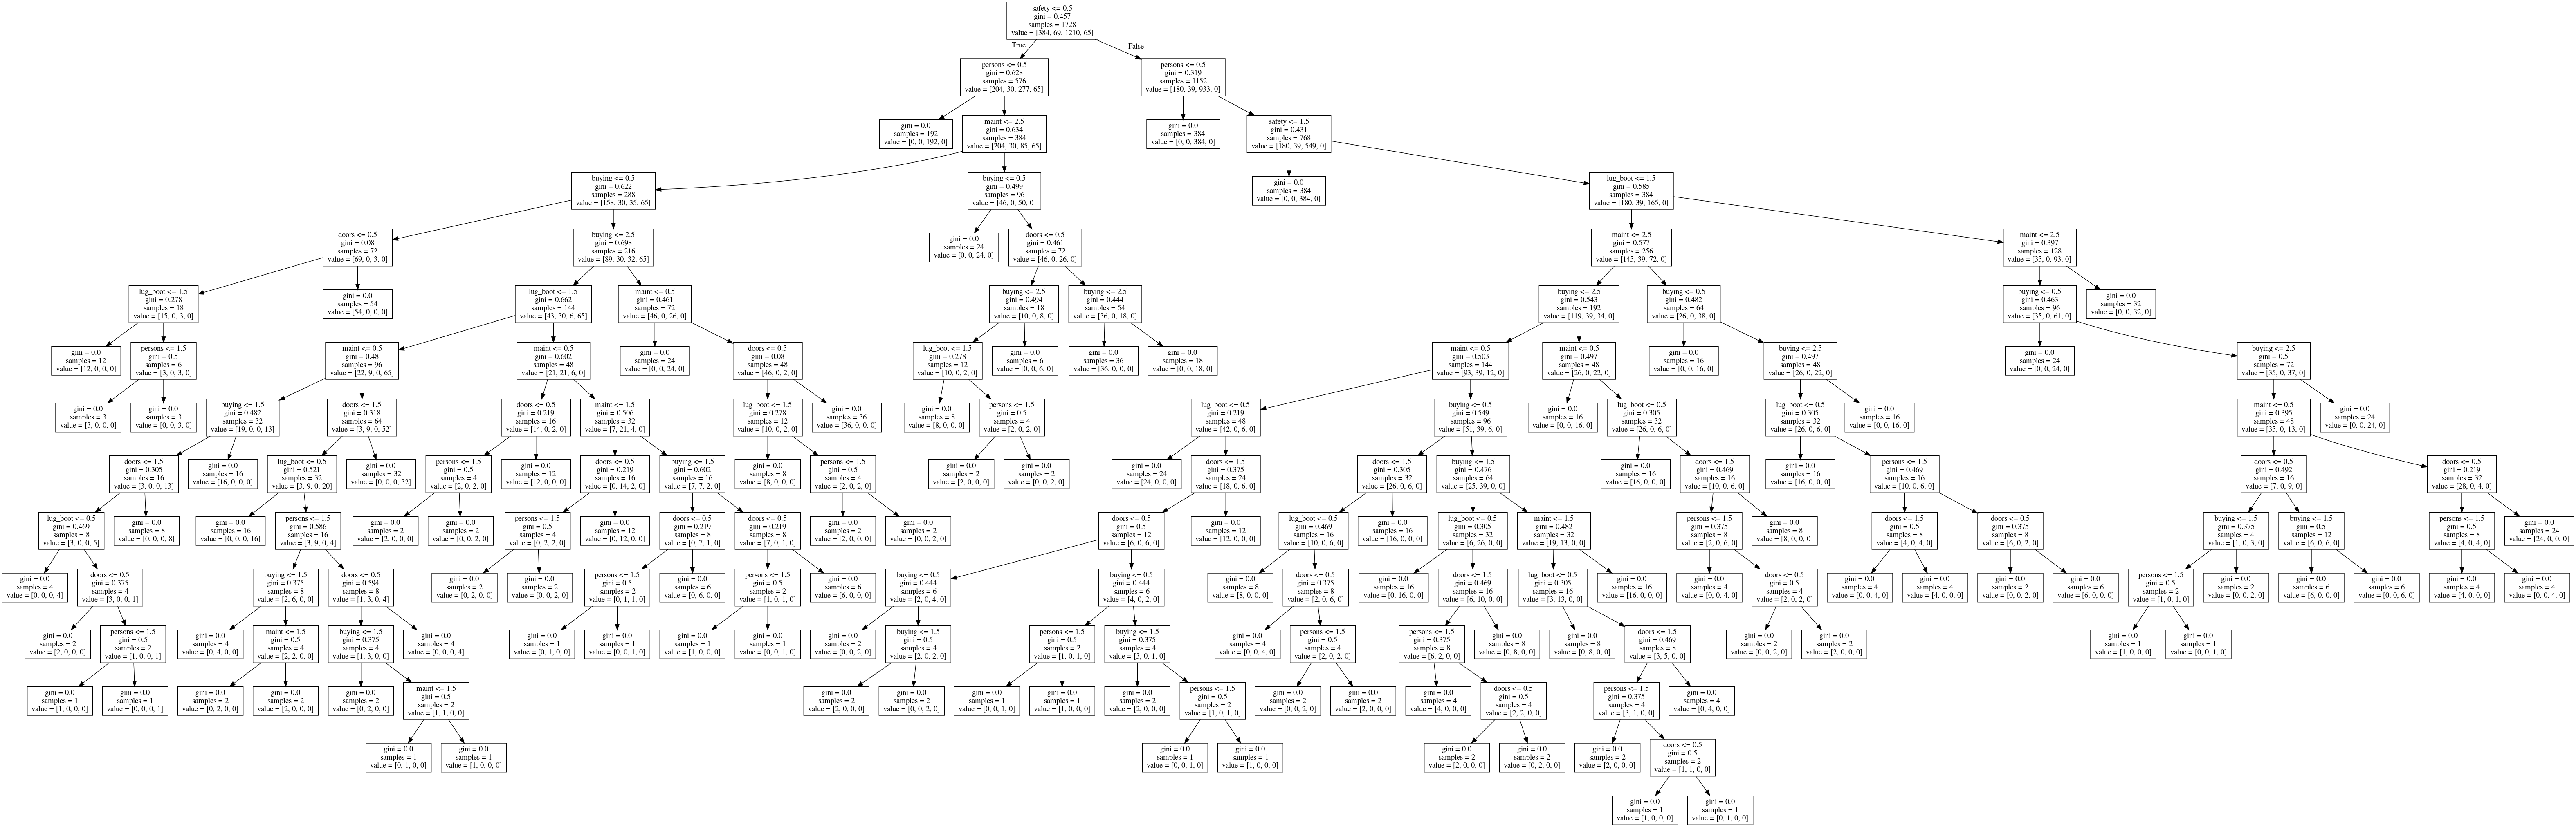

In [12]:
my_tree = DecisionTreeClassifier(max_features=5)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

In [13]:
my_tree = DecisionTreeClassifier(max_features=1)
my_tree.fit(data, target)
draw_decision_tree(my_tree, data.columns)

**Вывод:** при увеличении параметра max_features наблюдаем более гибкую модель.

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [15]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [73]:
def probs(y):
    unique_values, indices = np.unique(y, return_counts=True)
    return indices / len(y)

In [221]:
def entropy(y):  
    return -np.dot(probs(y), np.log2(probs(y))).sum()

def gini(y):
    return 1 - np.square(probs(y)).sum()

def variance(y):
    return (y - np.square(np.average(y))).sum() / len(y)

def mad_median(y):
    return np.absolute(y - np.median(y)).sum() / len(y)

In [222]:
criterions = {'entropy': entropy, 'gini': gini, 'variance': variance, 'mad_median': mad_median}

In [223]:
class Predicate:
    
    def __init__(self, feature, threshold):
        self.feature = feature
        self.threshold = threshold
        
    def evaluate(self, sample):
        if (sample[self.feature] < self.threshold):
            return True
        return False

In [224]:
class Node:
    
    def __init__(self, depth):
        self.depth = depth
        
    def set_left(self, node):
        self.left_child = node
        
    def set_right(self, node):
        self.right_child = node
        
    def set_predicate(self, predicate):
        self.predicate = predicate
        
    def get_to_next(self, sample):
        if self.predicate(sample):
            return self.right
        return self.left
    
    def set_answer(self, answer, probabilities=None):
        self.answer = answer
        if probabilities is None:
            return
        self.probabilities = probabilities

In [297]:
class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        
    def functional(self, indices, indices_left, indices_right, predicate):
        first = criterions[self.criterion](self.y[indices])
        second = (len(indices_left) / len(indices)) * criterions[self.criterion](self.y[indices_left])
        third = (len(indices_right) / len(indices)) * criterions[self.criterion](self.y[indices_right])
        return first - second - third
    
    def split(self, indices, predicate):
        indices_left = np.array([i for i in indices if not predicate.evaluate(self.X[i])])
        indices_right = np.array([i for i in indices if predicate.evaluate(self.X[i])])
        return indices_left, indices_right
        
    def best_split(self, indices):
        max_result = [None, None]
        for feature in range(len(self.X[0])):
            all_values = np.unique(self.X[indices, feature])
            if (len(all_values) > 1000):
                all_values = np.random.choice(all_values, 300, replace=False)
            for value in all_values:
                predicate = Predicate(feature, value)
                indices_left, indices_right = self.split(indices, predicate)
                if len(indices_left) == 0 or len(indices_right) == 0:
                    continue
                current_result = self.functional(indices, indices_left, indices_right, predicate)
                if (max_result[0] is None or max_result[0] < current_result):
                    max_result[0] = current_result
                    max_result[1] = np.array([indices_left, indices_right, predicate])
        return max_result[1]
            
    
    def one_step_fit(self, current_node, indices):
        if self.current_depth == self.max_depth or len(indices) < self.min_samples_split or len(np.unique(self.y[indices])) < 2:
            self.current_depth -= 1
            current_node.set_left(None)
            current_node.set_right(None)
            if self.criterion in ['gini', 'entropy']:
                answer = np.bincount(self.y[indices]).argmax()
                probabilities = np.bincount(self.y[indices], minlength=self.number_of_classes) / len(indices)
                current_node.set_answer(answer, probabilities)
            elif self.criterion in ['variance', 'mad_median']:
                answer = self.y[indices].mean()
                current_node.set_answer(answer)
        
        else:
            indices_left, indices_right, predicate = self.best_split(indices)
            current_node.set_predicate(predicate)
            current_node.set_left(Node(self.current_depth + 1))
            current_node.set_right(Node(self.current_depth + 1))
            self.current_depth += 1
            self.one_step_fit(current_node.left_child, indices_left)
            self.current_depth += 1
            self.one_step_fit(current_node.right_child, indices_right)
            self.current_depth -= 1
            
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.criterion in ['gini', 'entropy']:
            self.number_of_classes = len(np.unique(y))
        self.root = Node(0)
        self.current_depth = 0
        self.one_step_fit(self.root, range(len(X)))
        return self
        
    def predict(self, X):
        result = np.array([])
        for sample in X:
            current_node = self.root
            while (current_node.left_child != None):
                if (current_node.predicate.evaluate(sample)):
                    current_node = current_node.right_child
                else:
                    current_node = current_node.left_child
            result = np.append(result, [current_node.answer])
        return result
        
    def predict_proba(self, X):
        if self.criterion not in ['gini', 'entropy']:
            print("predict_proba is available only for classification")
            return
        result = np.zeros((len(X), self.number_of_classes))
        for i in range(len(X)):
            sample = X[i]
            current_node = self.root
            while (current_node.left_child != None):
                if (current_node.predicate.evaluate(sample)):
                    current_node = current_node.right_child
                else:
                    current_node = current_node.left_child
            result[i] = current_node.probabilities
        return result

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [260]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [261]:
tree = DecisionTree(max_depth=8, criterion='gini')
tree.fit(X_train, y_train)
print(accuracy_score(y_test, tree.predict(X_test)))

0.8611111111111112


In [262]:
tree = DecisionTree(max_depth=8, criterion='entropy')
tree.fit(X_train, y_train)
print(accuracy_score(y_test, tree.predict(X_test)))

0.8805555555555555


**Вывод:** критерии gini и entropy дают разные результаты.

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [263]:
%%time
parameters = {'max_depth':range(3, 11), 'criterion':('gini', 'entropy')}

gscv = GridSearchCV(estimator=DecisionTree(), param_grid=parameters, scoring='accuracy', cv=5)
gscv.fit(X, y)
print(gscv.best_score_, gscv.best_params_)

0.8046744574290484 {'criterion': 'entropy', 'max_depth': 9}
CPU times: user 29min 6s, sys: 331 ms, total: 29min 7s
Wall time: 29min 7s


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

In [278]:
gini_results = gscv.cv_results_['mean_test_score'][0:8]
entropy_results = gscv.cv_results_['mean_test_score'][8:16]
index = np.argmax(gscv.cv_results_['mean_test_score'])
best_result = gscv.cv_results_['mean_test_score'][index]
best_params = gscv.cv_results_['params'][index]
print("Gini results: {}".format(gini_results))
print("Entropy results: {}".format(entropy_results))

Gini results: [0.4296049  0.54646633 0.62882582 0.71563717 0.74067891 0.77406789
 0.78297162 0.78185865]
Entropy results: [0.50361714 0.63772955 0.73845298 0.77629382 0.79632721 0.79855314
 0.80467446 0.80244853]


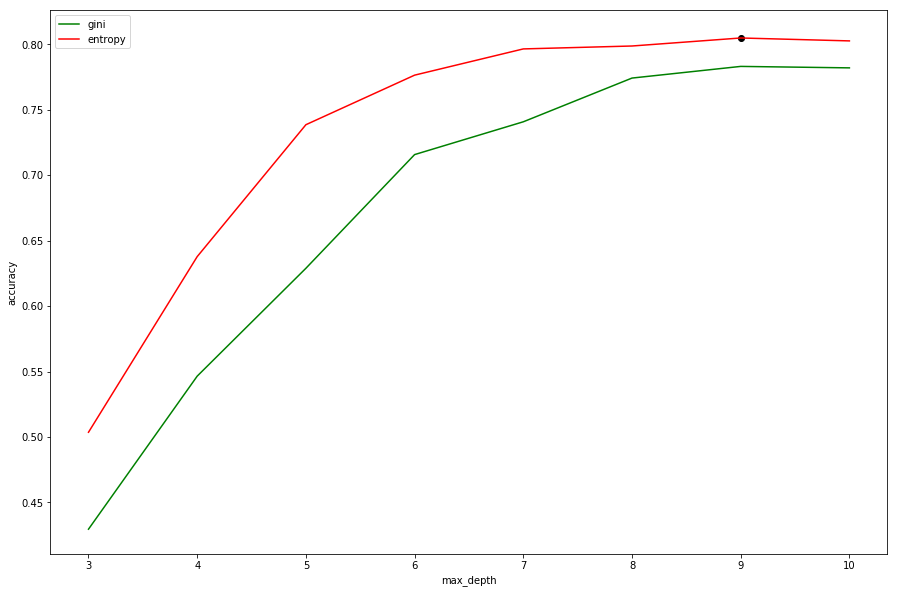

In [277]:
plt.figure(figsize=(15,10))
plt.plot(range(3, 11), gini_results, color='green', label='gini')
plt.plot(range(3, 11), entropy_results, color='red', label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.scatter(best_params['max_depth'], best_result, color='black')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [266]:
print("Best result: {}, with criterion = {} and max_depth = {}".format(best_result, best_params['criterion'], best_params['max_depth']))

Best result: 0.8046744574290484, with criterion = entropy and max_depth = 9


Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [267]:
tree = DecisionTree(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
tree.fit(X_train, y_train)
results_proba = tree.predict_proba(X_test)

for i in range(10):
    print(results_proba[i])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

In [268]:
print(results_proba.mean(axis=0))

[0.08611111 0.09246032 0.08214286 0.09166667 0.12192052 0.13611111
 0.10357143 0.1        0.08231229 0.1037037 ]


Чему примерно равна максимальная вероятность в полученном векторе?

In [269]:
print(results_proba.mean(axis=0).max())

0.1361111111111111


In [270]:
(uniques, real_probs) = np.unique(y_test, return_counts=True)
real_probs = real_probs / len(y_test)
print(real_probs)

[0.09166667 0.07777778 0.09166667 0.09444444 0.12777778 0.13055556
 0.09722222 0.09444444 0.08333333 0.11111111]


**Вывод:** Видно, что реальное распределение y_test и распределение, полученное предсказанием дерева, схожи.

### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [286]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [289]:
tree = DecisionTree(max_depth=8, criterion='variance')
tree.fit(X_train, y_train)
print(mean_squared_error(y_test, tree.predict(X_test)))

8.829696406734941


In [292]:
tree = DecisionTree(max_depth=8, criterion='mad_median')
tree.fit(X_train, y_train)
print(mean_squared_error(y_test, tree.predict(X_test)))

8.909685922602893


**Вывод:** критерии variance и mad_median дают разные результаты.

С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [298]:
%%time
parameters = {'max_depth':range(2, 9), 'criterion':('variance', 'mad_median')}

gscv2 = GridSearchCV(estimator=DecisionTree(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
gscv2.fit(X, y)
print(gscv2.best_score_, gscv2.best_params_)

-29.987692638954506 {'criterion': 'mad_median', 'max_depth': 3}
CPU times: user 9min 28s, sys: 321 ms, total: 9min 29s
Wall time: 9min 29s


Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

In [316]:
parameters = range(2, 9)
variance_results = gscv2.cv_results_['mean_test_score'][0:7]
mad_median_results = gscv2.cv_results_['mean_test_score'][7:14]
index = np.argmax(gscv2.cv_results_['mean_test_score'])
best_result = gscv2.cv_results_['mean_test_score'][index]
best_params = gscv2.cv_results_['params'][index]
print("Variance results: {}".format(variance_results))
print("Mad_median results: {}".format(mad_median_results))

Variance results: [-41.54236616 -37.0636636  -42.54708349 -38.15728359 -39.99276061
 -39.15365502 -39.52643522]
Mad_median results: [-37.60854933 -29.98769264 -31.14652046 -35.29383641 -36.58098205
 -36.08366498 -36.71796862]


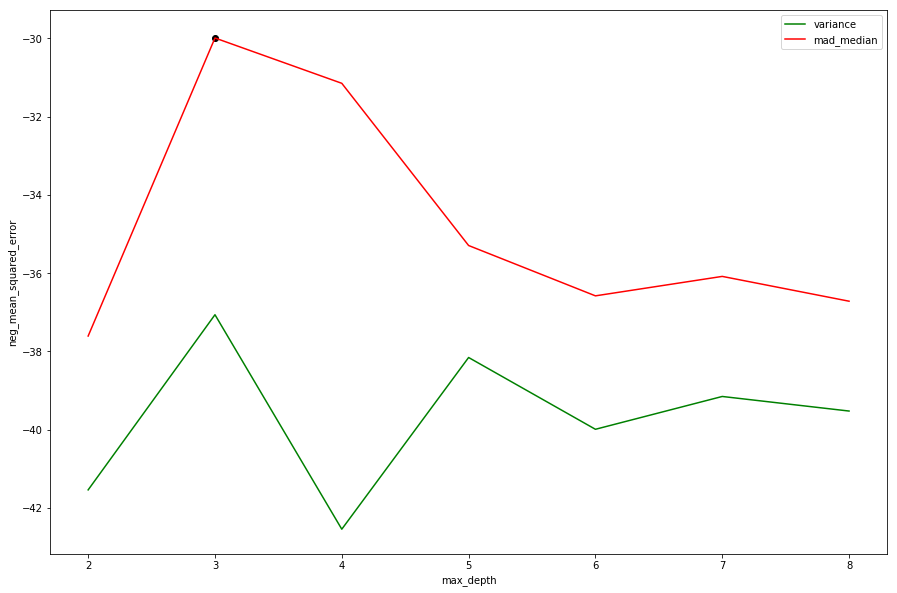

In [317]:
plt.figure(figsize=(15,10))
plt.plot(range(2, 9), variance_results, color='green', label='variance')
plt.plot(range(2, 9), mad_median_results, color='red', label='mad_median')
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')
plt.scatter(best_params['max_depth'], best_result, color='black')
plt.legend()
plt.show()

Для сравнения, построим такой же график для классического решающего дерева:

-29.867005928853757 {'criterion': 'mae', 'max_depth': 3}
Variance results: [-41.58862297 -36.48471728 -37.05105803 -37.36668251 -38.13120681
 -39.45150341 -41.24615235]
Mad_median results: [-39.55890316 -29.86700593 -30.81043972 -34.26236166 -34.41947628
 -37.40728261 -41.64918478]


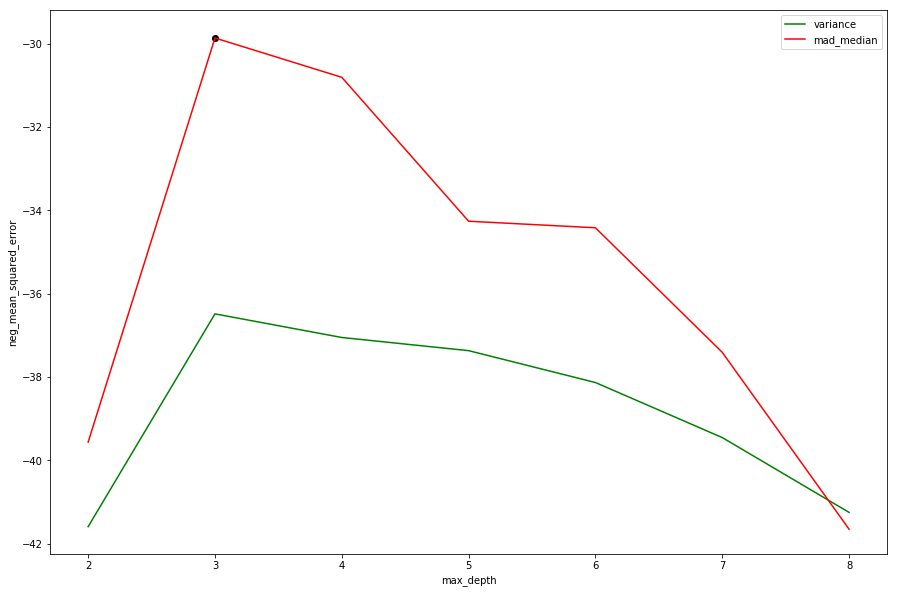

In [321]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':range(2, 9), 'criterion':('mse', 'mae')}
new_gscv2 = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
new_gscv2.fit(X, y)
print(new_gscv2.best_score_, new_gscv2.best_params_)

parameters = range(2, 9)
variance_results = new_gscv2.cv_results_['mean_test_score'][0:7]
mad_median_results = new_gscv2.cv_results_['mean_test_score'][7:14]
index = np.argmax(new_gscv2.cv_results_['mean_test_score'])
new_best_result = new_gscv2.cv_results_['mean_test_score'][index]
new_best_params = new_gscv2.cv_results_['params'][index]
print("Variance results: {}".format(variance_results))
print("Mad_median results: {}".format(mad_median_results))

plt.figure(figsize=(15,10))
plt.plot(range(2, 9), variance_results, color='green', label='variance')
plt.plot(range(2, 9), mad_median_results, color='red', label='mad_median')
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')
plt.scatter(new_best_params['max_depth'], new_best_result, color='black')
plt.legend()
plt.show()

**Вывод:** в целом, графики схожи, в обоих случаях переобучение начинает проявляться при max_depth $\geqslant$ 4.

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [322]:
print("Best result: {}, with criterion = {} and max_depth = {}".format(best_result, best_params['criterion'], best_params['max_depth']))

Best result: -29.987692638954506, with criterion = mad_median and max_depth = 3
